# Nama Muhammad Novan Saputra
# Nim 2109106032
# posttset 4 KB

# import library

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

# Read data

In [4]:
datasplit = pd.read_csv("Bengaluru_House_Data.csv")
datasplit.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


## Attribute, Label, Value, dan Record Dataset

In [5]:
datasplit.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

In [6]:
datasplit.shape

(13320, 9)

## MELAKUKAN DATA SPLITTING MENJADI 2 BAGIAN

In [7]:
x = datasplit.iloc[:, :-1]
y = datasplit.iloc[:, -1]

# Alokasikan training set ke 0.3 atau perbandingan 70:30

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [9]:
print("Dimensi x_train :", x_train.shape)
print("Dimensi x_test :", x_test.shape)
print("Dimensi y_train :", y_train.shape)
print("Dimensi y_test:", y_test.shape)

Dimensi x_train : (9324, 8)
Dimensi x_test : (3996, 8)
Dimensi y_train : (9324,)
Dimensi y_test: (3996,)


## 1.) NORMALISASI 1 ATTRIBUT DATA

In [10]:
mms = MinMaxScaler()

In [11]:
normal = mms.fit_transform(datasplit[['balcony']])
datanormal = pd.DataFrame(normal)
datanormal.head(10)

,0
0,0.333333
1,1.000000
2,1.000000
3,0.333333
4,0.333333
5,0.333333
6,NaN
7,NaN
8,0.333333
9,NaN


## VISUALISASI NORMALISASI DATA

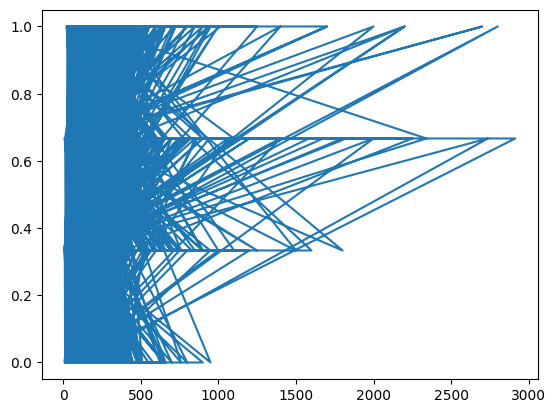

In [12]:
plt.plot(datasplit.price, datanormal[0])
plt.show()

# 2.) Standarisasi Data

### MENGECEK NILAI STD SEBELUM STANDARISASI

In [38]:
before = pd.DataFrame(np.std(datasplit))

In [14]:
print("NILAI STD SEBELUM STANDARISASI:")
before

NILAI STD SEBELUM STANDARISASI:


,0
bath,1.341407
balcony,0.817231
price,148.966082


## Memulai standarisasi

In [15]:
standard_scaler = StandardScaler()

In [16]:
DataStandar = standard_scaler.fit_transform(
    datasplit[['bath', 'balcony', 'price']]
)

# Hasil Setelah Standarisasi

In [17]:
print("Nilai Setelah Standarisasi:", np.nanstd(DataStandar))
print("Nilai Mean Setelah Standarisasi:", np.nanmean(DataStandar))
print("Nilai Median Setelah Standarisasi:", np.nanmean(DataStandar))
print("Nilai Standarisasi:")
StandarisasiData = pd.DataFrame(DataStandar)
StandarisasiData.head(10)

Nilai Setelah Standarisasi: 1.0
Nilai Mean Setelah Standarisasi: -8.104362381499183e-17
Nilai Median Setelah Standarisasi: -8.104362381499183e-17
Nilai Standarisasi:


,0,1,2
0,-0.516331,-0.715068,-0.493372
1,1.720126,1.732220,0.049906
2,-0.516331,1.732220,-0.339444
3,0.229155,-0.715068,-0.117917
4,-0.516331,-0.715068,-0.413286
5,-0.516331,-0.715068,-0.500554
6,0.974641,NaN,0.613793
7,0.974641,NaN,3.272116
8,0.229155,-0.715068,-0.331053
9,2.465612,NaN,1.728141


# 3) Data Cleaning

## CEK NILAI NULL PADA DATASET

In [19]:
datasplit.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [20]:
df = pd.read_csv("Bengaluru_House_Data.csv")

In [21]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

## Cek Letak Nilai NULL

In [22]:
df[df.isnull().any(axis = 1)]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732,4.0,NaN,204.00
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,NaN,600.00
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,NaN,1310,3.0,1.0,63.25
...,...,...,...,...,...,...,...,...,...
13310,Super built-up Area,Ready To Move,Rachenahalli,2 BHK,NaN,1050,2.0,2.0,52.71
13311,Plot Area,Ready To Move,Ramamurthy Nagar,7 Bedroom,NaN,1500,9.0,2.0,250.00
13312,Super built-up Area,Ready To Move,Bellandur,2 BHK,NaN,1262,2.0,2.0,47.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00


# MENANGANI NILAI NULL DENGAN PANDAS

# Bilangan bulat Dengan MEDIAN

In [23]:
df['balcony'] = df['balcony'].fillna(df['balcony'].median())

In [24]:
df.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony            0
price              0
dtype: int64

# Tulisan dengan modus

In [25]:
df['society'] = df['society'].fillna(df['society'].mode()[0])

In [26]:
df.isna().sum()

area_type        0
availability     0
location         1
size            16
society          0
total_sqft       0
bath            73
balcony          0
price            0
dtype: int64

## Desimal dengan Mean

In [27]:
df['bath'] = df['bath'].fillna(df['bath'].mean())

In [28]:
df.isna().sum()

area_type        0
availability     0
location         1
size            16
society          0
total_sqft       0
bath             0
balcony          0
price            0
dtype: int64

## 4.)MENGUBAH TIPE DATA SALAH SATU ATTRIBUT ANGKA

# Cek Type data

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       13320 non-null  object 
 5   total_sqft    13320 non-null  object 
 6   bath          13320 non-null  float64
 7   balcony       13320 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [32]:
df['bath'] = df['bath'].astype('object')

# Kita cek terlebih dahulu

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       13320 non-null  object 
 5   total_sqft    13320 non-null  object 
 6   bath          13320 non-null  object 
 7   balcony       13320 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(2), object(7)
memory usage: 936.7+ KB


In [34]:
ohencode = OneHotEncoder(sparse = False)

In [35]:
oh = ohencode.fit_transform(df[["area_type", "availability", 'location', 'size', 'society', 'total_sqft', 'bath', 'balcony', 'price']])

In [36]:
df_OneHotEncoder = pd.DataFrame(oh)
df_OneHotEncoder.head(20)

,0,1,2,3,4,5,6,7,8,9,...,8236,8237,8238,8239,8240,8241,8242,8243,8244,8245
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# selesai